Plotting RAQMS Model Output (clean)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import glob
import os
import netCDF4 as nc


In [27]:
#sample dataset check
dataset = xr.open_dataset('/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080200.5deg.ll.nc')
no2 = dataset['no2tot']
oh = dataset['oh']
oh = oh[0,63,:,:]

In [28]:
dataset

<xarray.Dataset> Size: 8GB
Dimensions:      (time: 1, tile: 6, grid_xt: 720, grid_yt: 361, grid_zt: 64)
Coordinates:
  * time         (time) float64 8B 214.0
  * grid_xt      (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * grid_yt      (grid_yt) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * grid_zt      (grid_zt) float64 512B 1.0 2.0 3.0 4.0 ... 61.0 62.0 63.0 64.0
Dimensions without coordinates: tile
Data variables: (12/175)
    imin         (tile) int32 24B ...
    imax         (tile) int32 24B ...
    jmin         (tile) int32 24B ...
    jmax         (tile) int32 24B ...
    lat          (time, grid_yt, grid_xt) float32 1MB ...
    lon          (time, grid_yt, grid_xt) float32 1MB ...
    ...           ...
    jo1d         (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    jno          (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    cot6hr       (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    emcofire     (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    covermx      (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    oxvermx      (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
Attributes:
    CDATE:        2023080200
    from:         fv32ll.gen.gen.deflate.f90
    case:         C192
    ak:           [0.0000000e+00 0.0000000e+00 5.7500000e-01 5.7410000e+00 2....
    bk:           [1.0000000e+00 9.9467119e-01 9.8862660e-01 9.8174229e-01 9....
    INTERPWT:     BILINWT
    uvpole:       implemented
    pathmap:      /ships22/raqms/lenzen/FV3GFS_V1_RELEASE/fix/fix_fv3/5DEGLL/...
    forecast_hr:  6.0
    timestep:     450.0

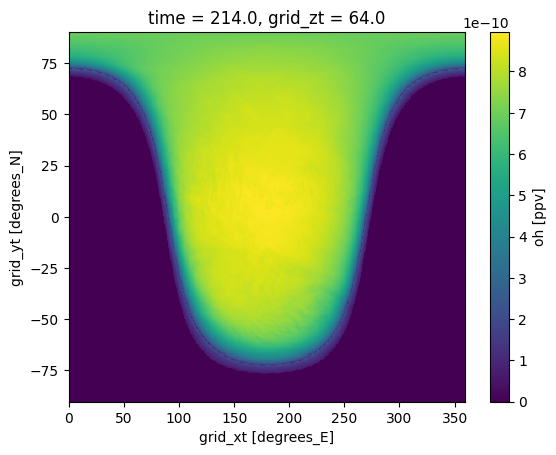

In [29]:
oh.plot() 

(1, 361, 720)


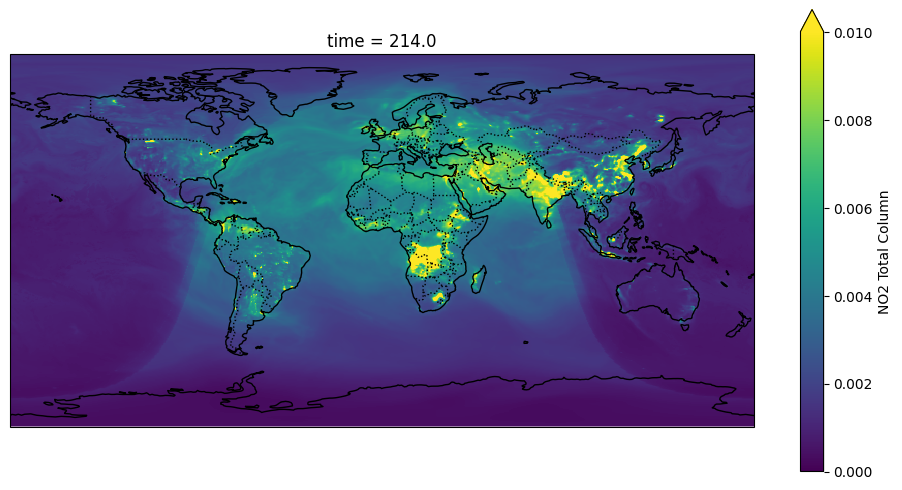

In [4]:
no2 = dataset['no2tot']
print(no2.shape)

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
no2.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=0.01, cbar_kwargs={'label': 'NO2 Total Column'})

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.set_xlim(95, 128)
#ax.set_ylim(-5, 22)

In [2]:
files = sorted(glob.glob("/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.202308*.nc"))
print(files)

['/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080100.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080106.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080112.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080118.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080200.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3

In [3]:
#grouping files by day
daily_files = {}
for f in files:
    filename = os.path.basename(f)
    timestamp = filename.split('.')[1]
    date_str = timestamp[:8]

    if date_str not in daily_files:
        daily_files[date_str] = [f]
    else:
        daily_files[date_str].append(f)
print(daily_files.keys())

dict_keys(['20230801', '20230802', '20230803', '20230804', '20230805', '20230806', '20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814', '20230815', '20230816', '20230817', '20230818', '20230819', '20230820', '20230821', '20230822', '20230823', '20230824', '20230825', '20230826', '20230827', '20230828', '20230829', '20230830', '20230831'])


In [4]:
day_files = daily_files['20230802']
print(day_files)

['/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080200.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080206.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080212.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/O3.OMPSLPMLSbias.OMPS.NM.CLDFR3.SZA70.O3.thin.25km.and.TROPOMICO.VIIRSAOD.FRAC.em12.phys.1.e-12.phys2/C192/5DEGll/tracer.2023080218.5deg.ll.nc']


In [10]:
no2_daily_avg.shape

(361, 720)

20230801


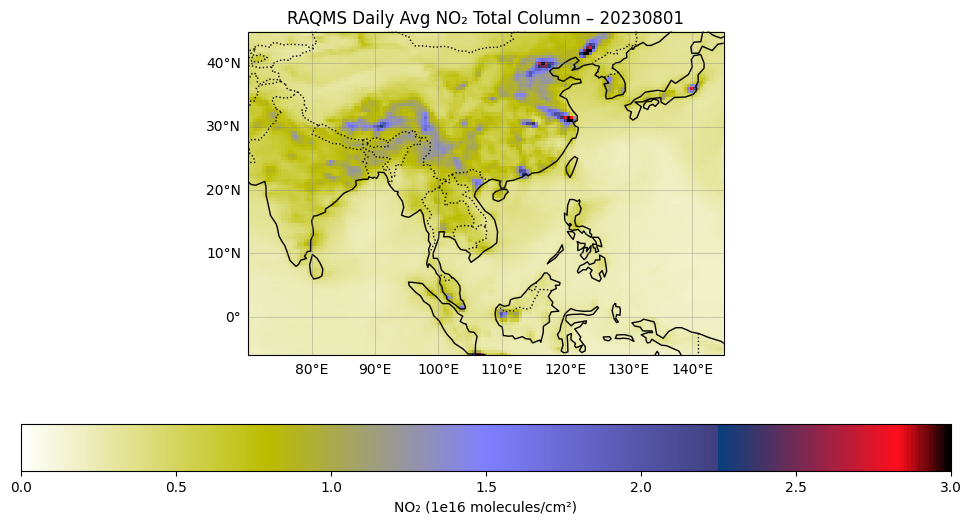

20230802


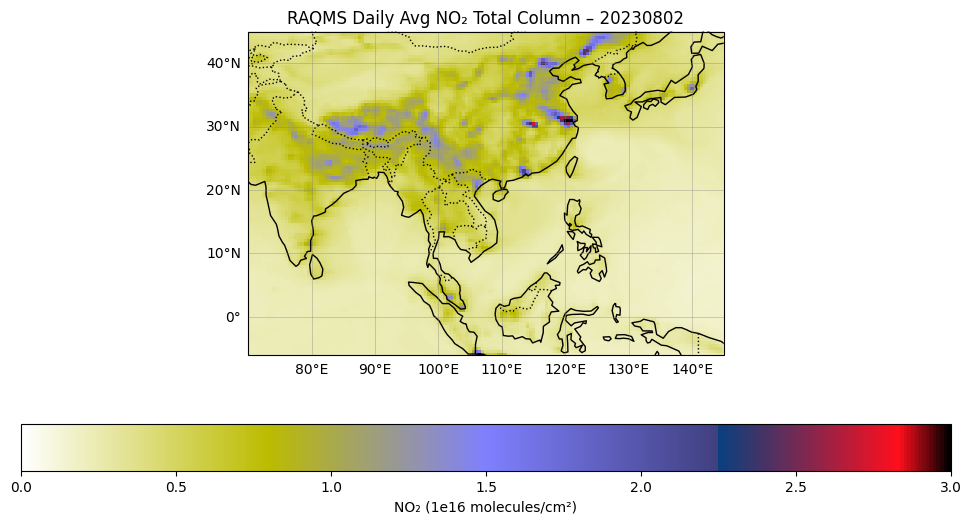

20230803


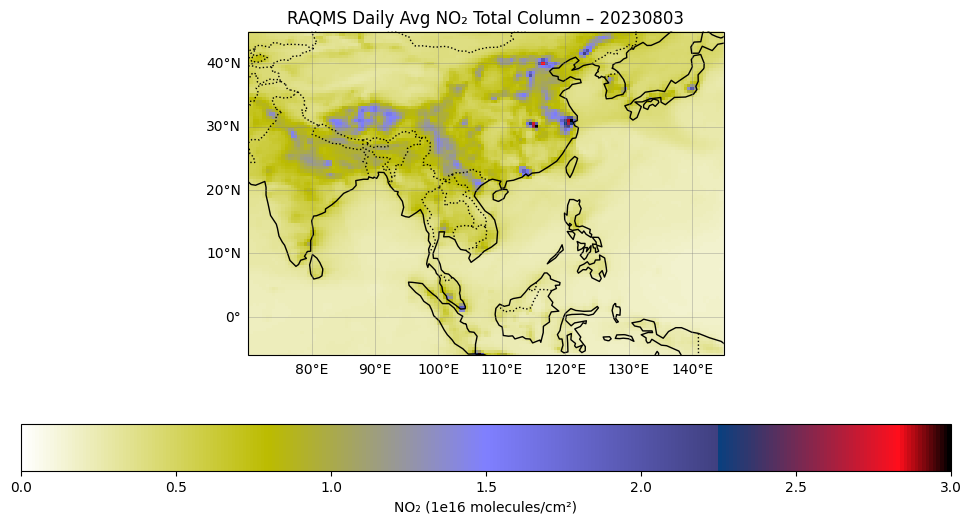

20230804


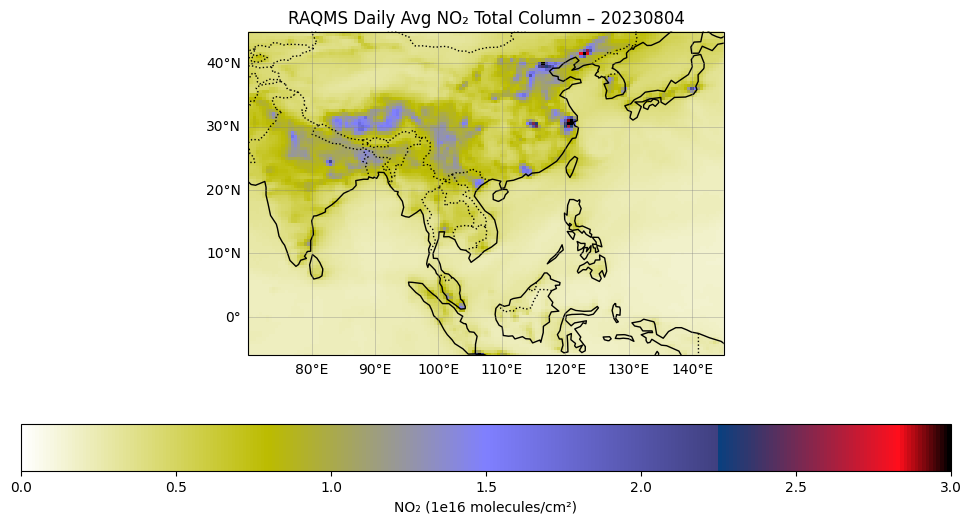

20230805


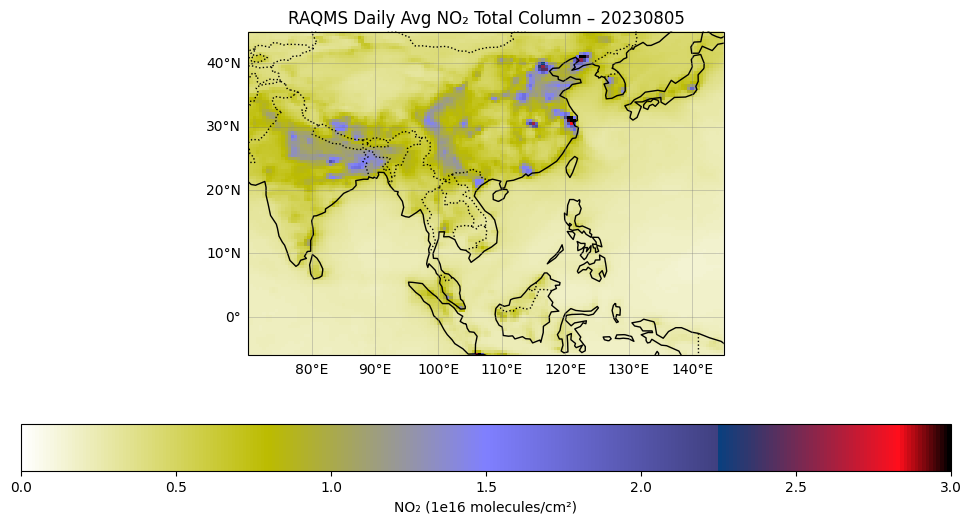

20230806


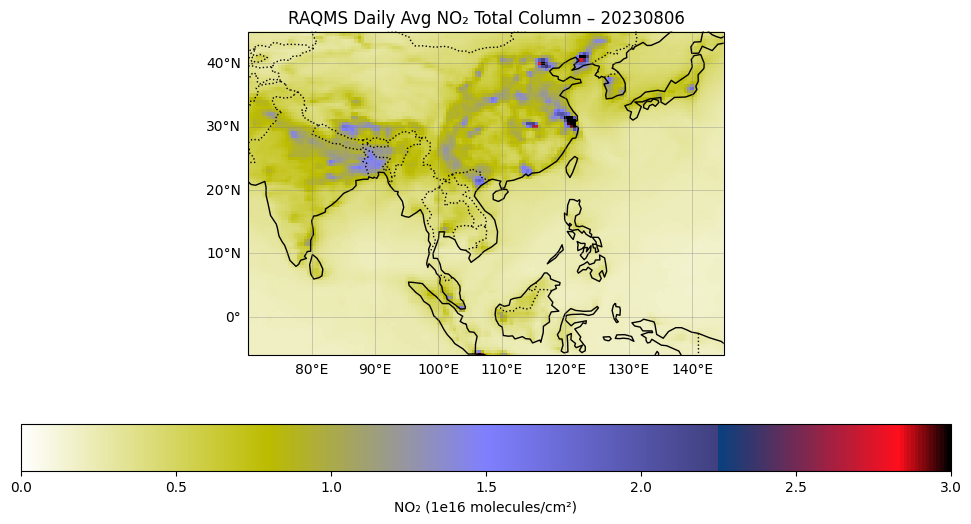

20230807


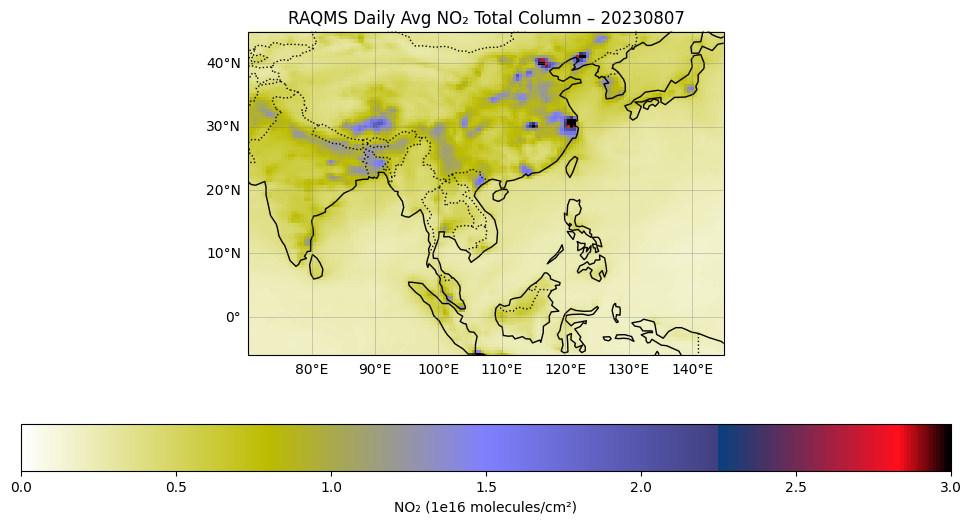

20230808


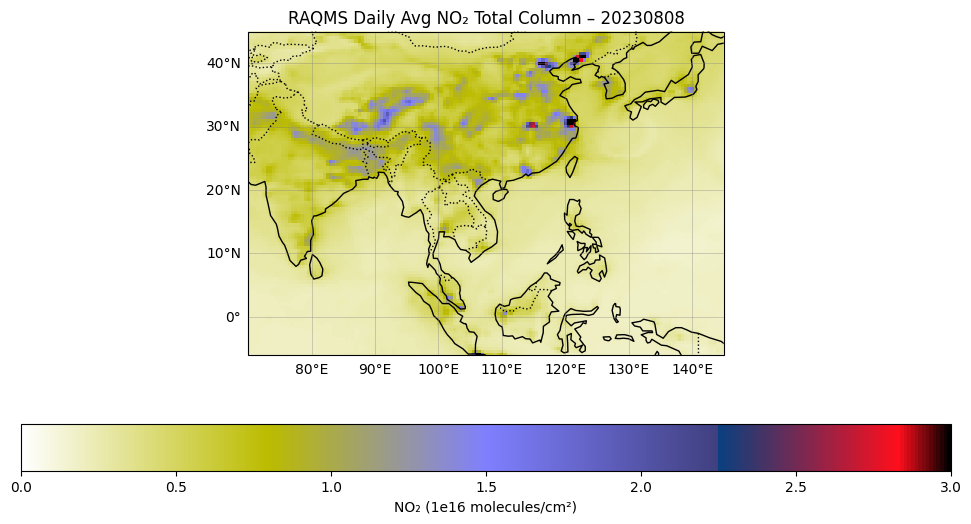

20230809


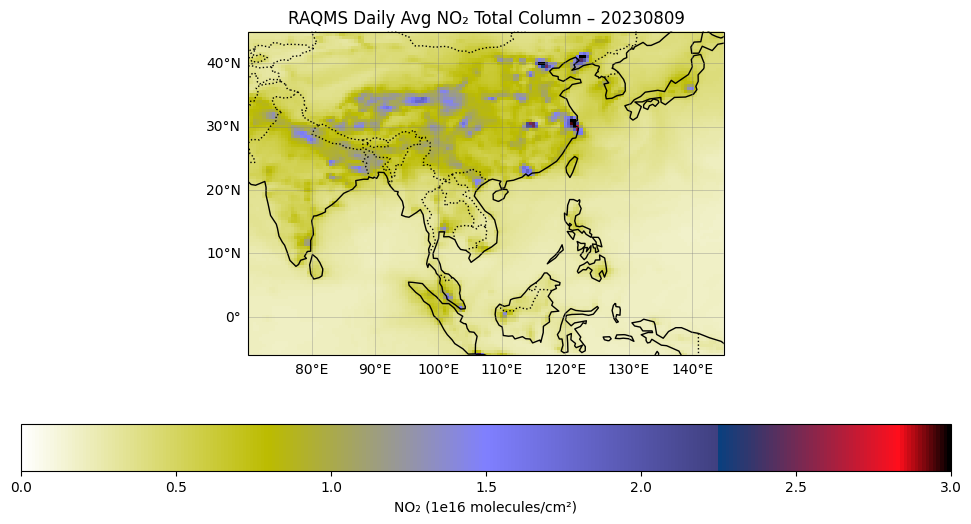

20230810


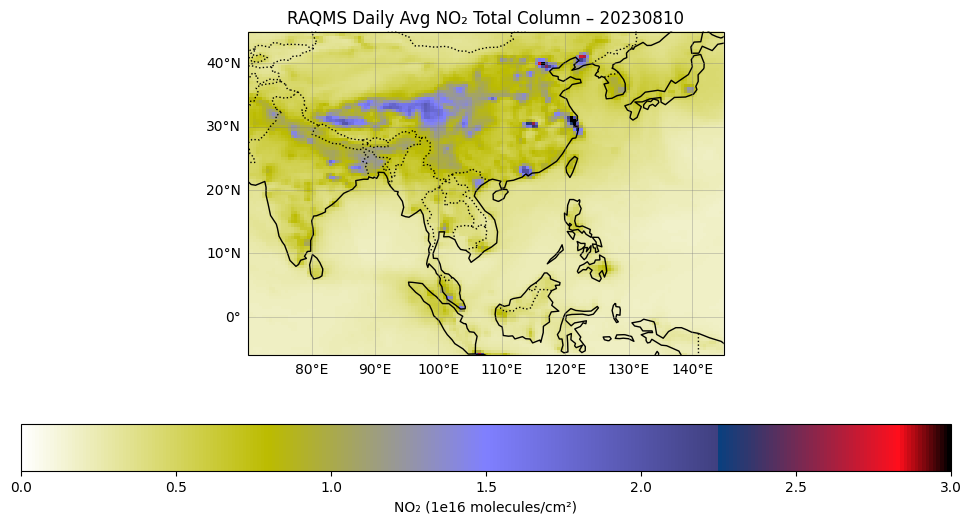

20230811


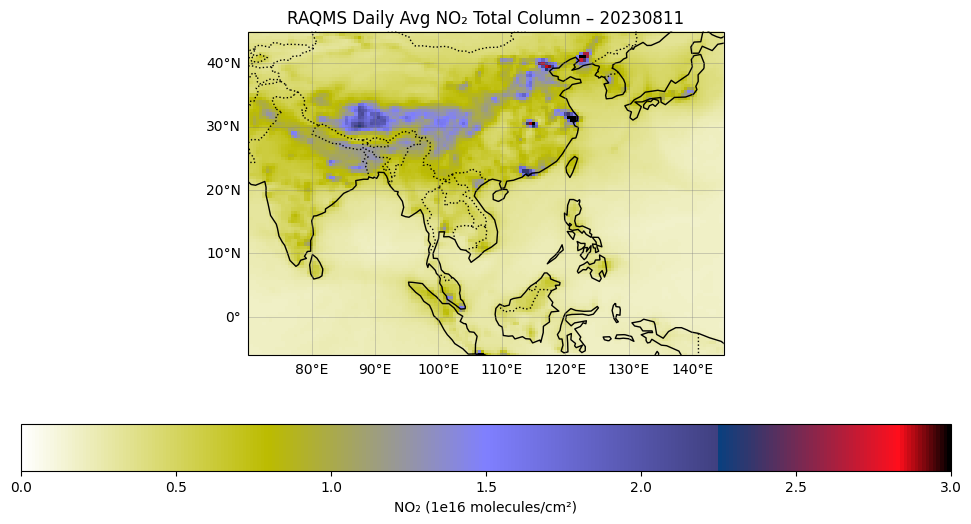

20230812


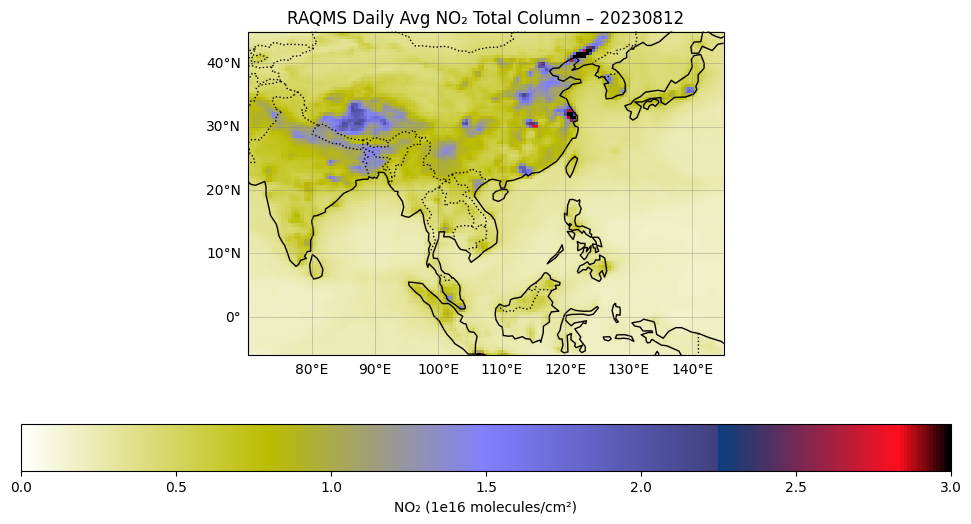

20230813


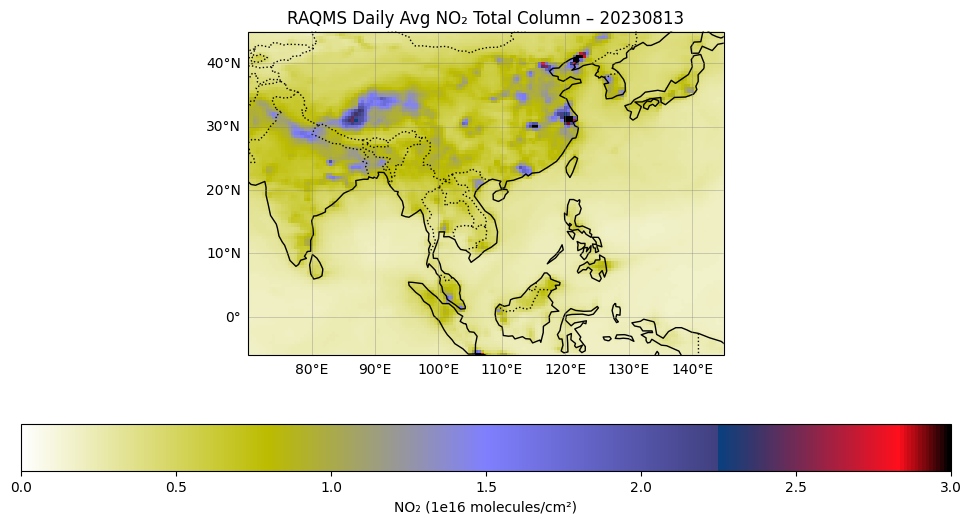

20230814


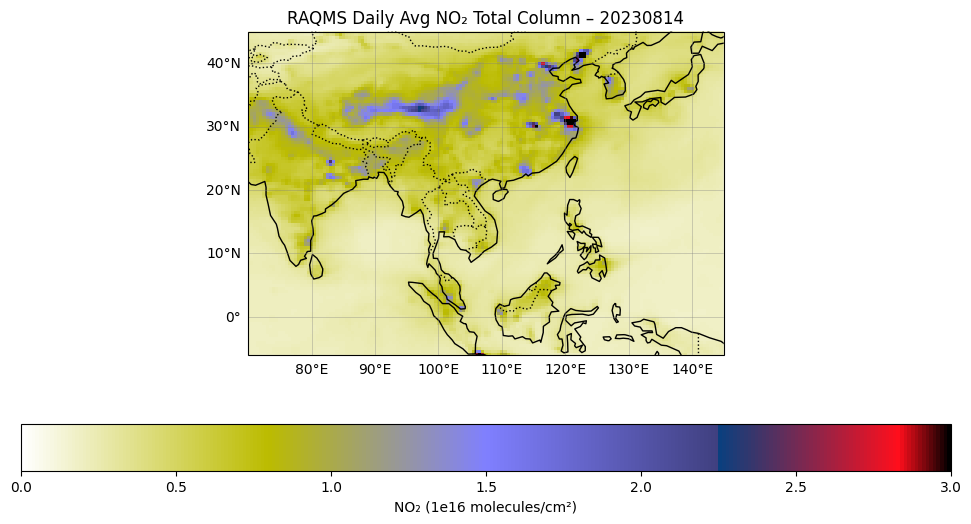

20230815


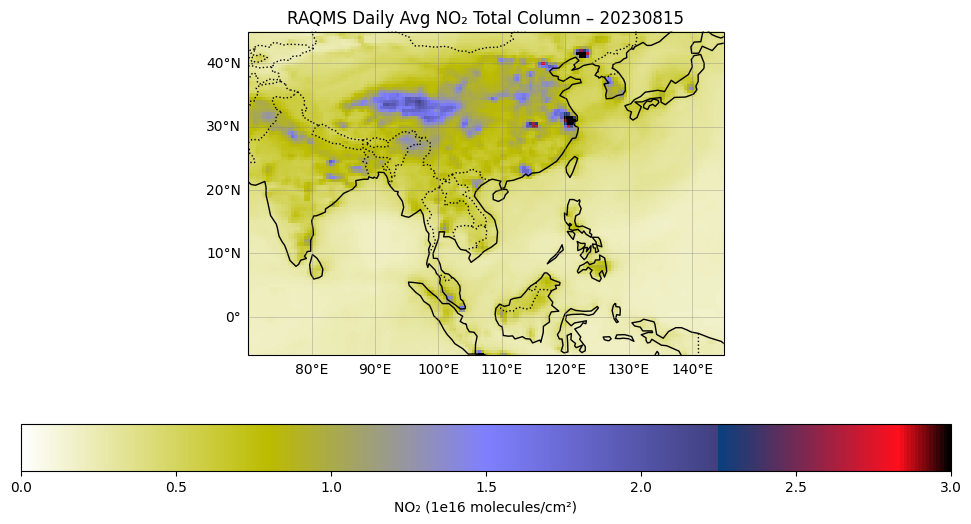

20230816


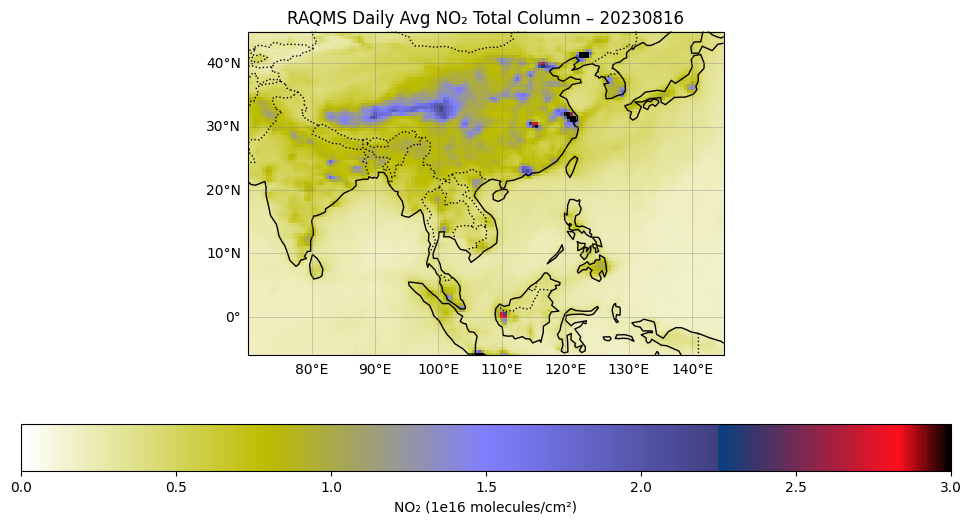

20230817


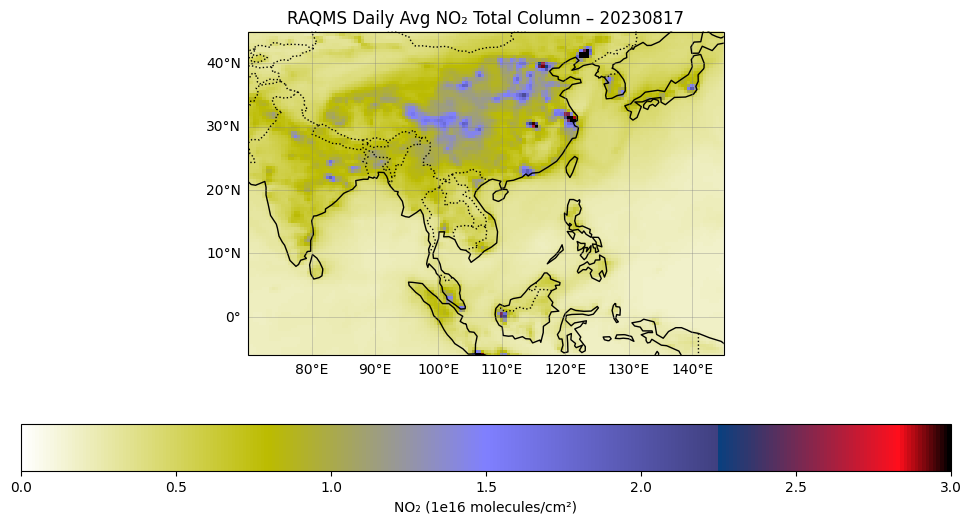

20230818


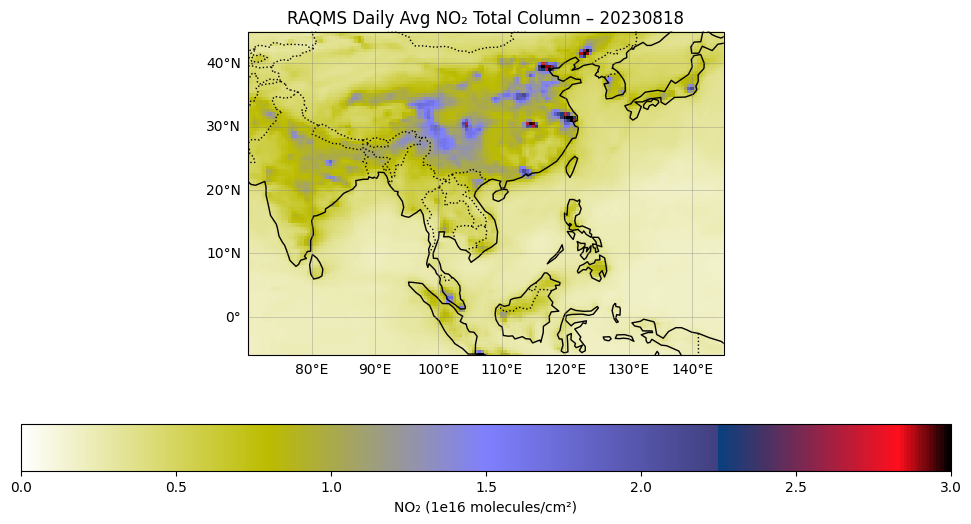

20230819


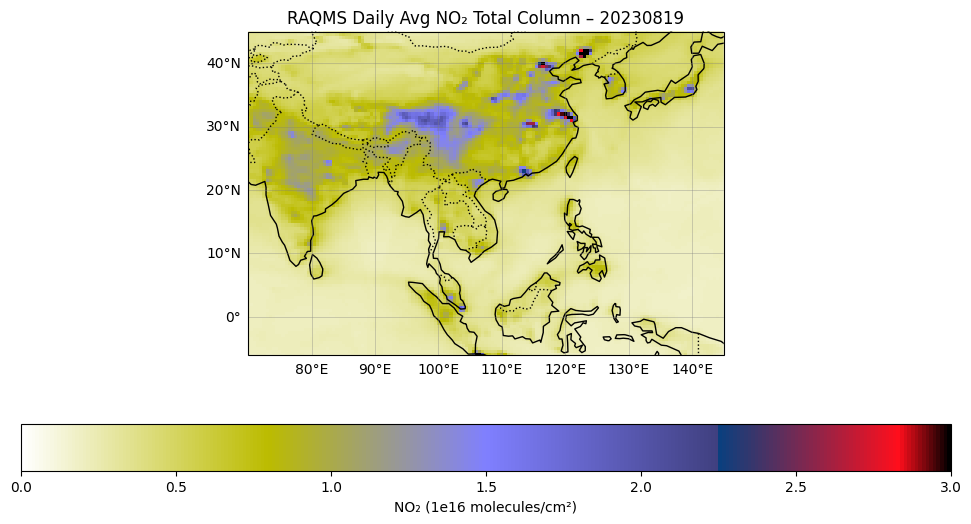

20230820


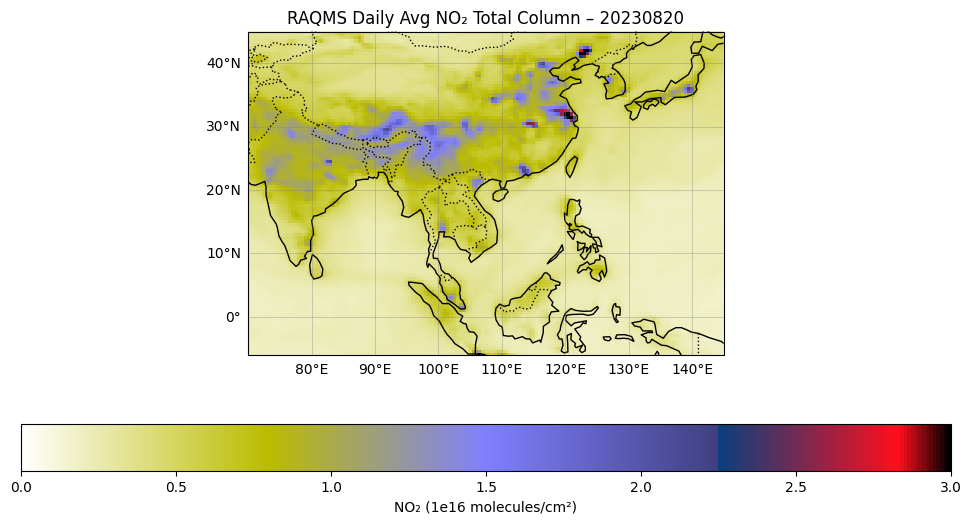

20230821


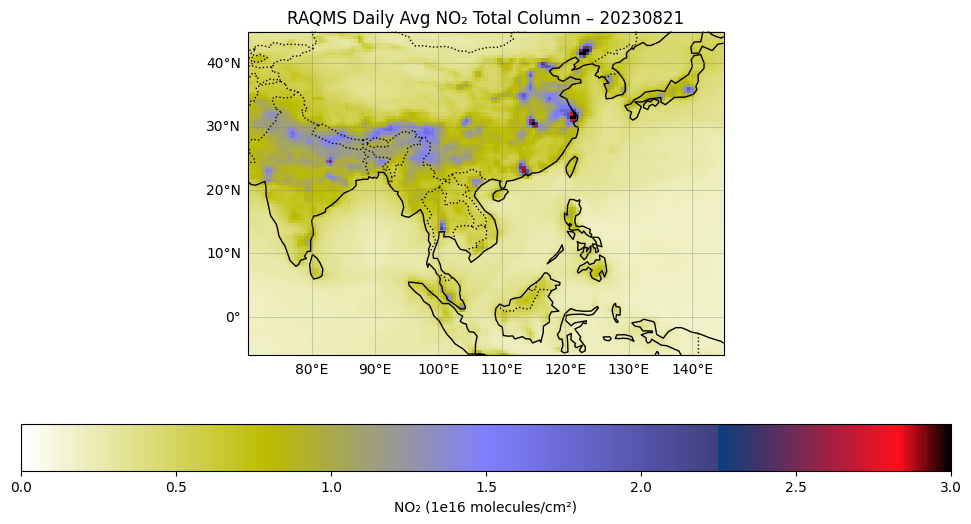

20230822


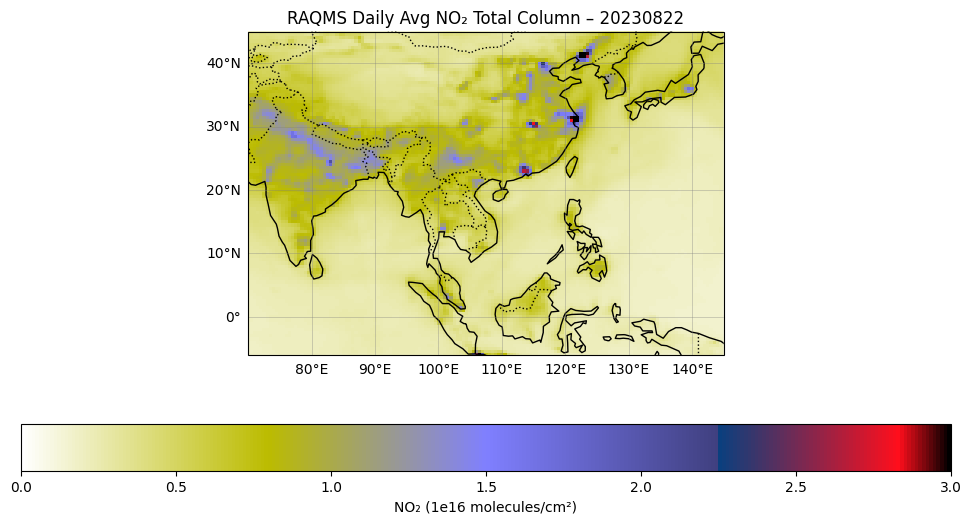

20230823


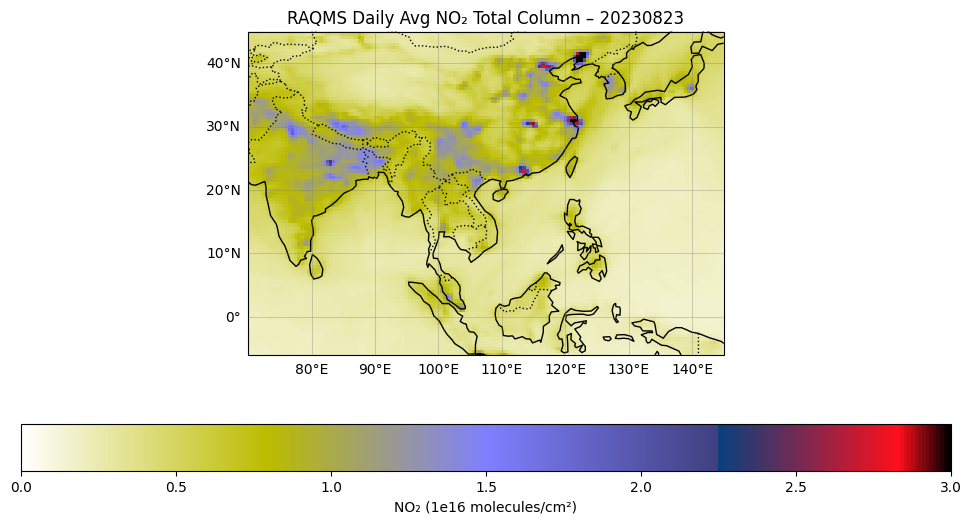

20230824


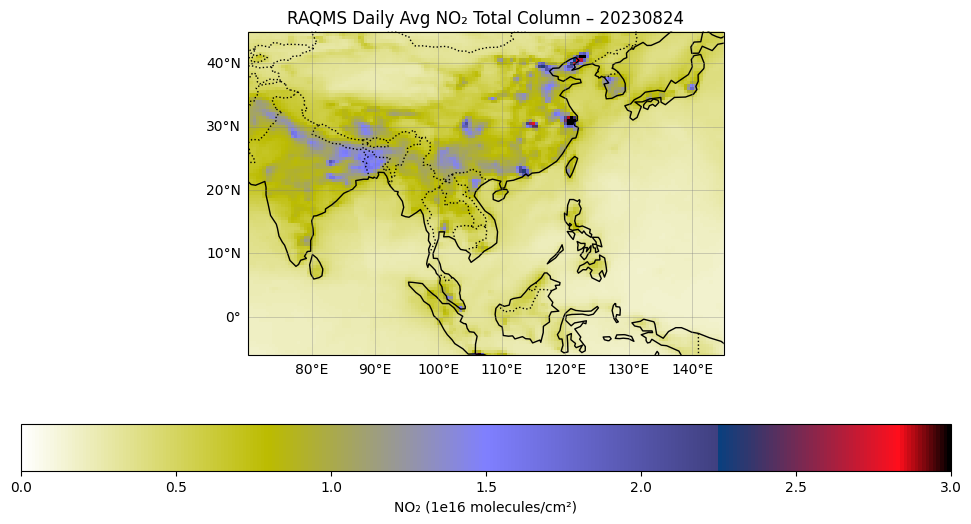

20230825


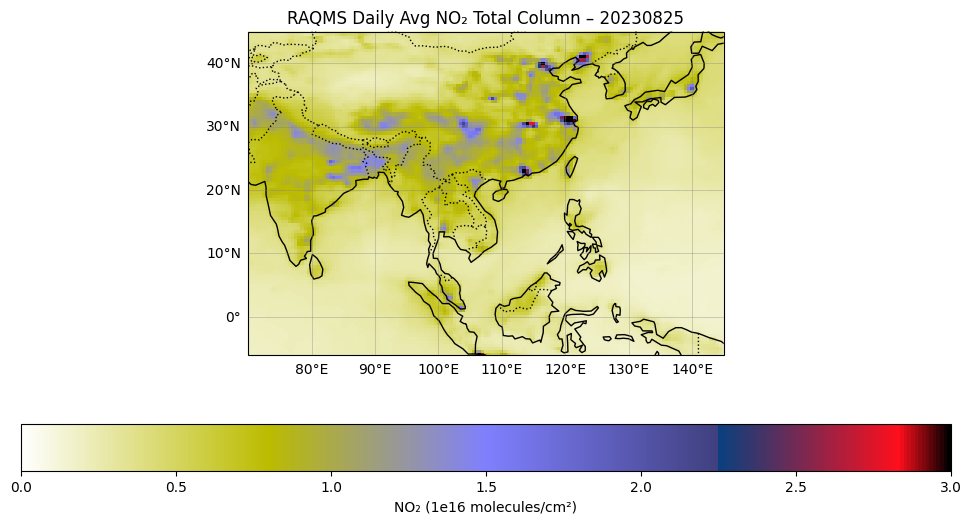

20230826


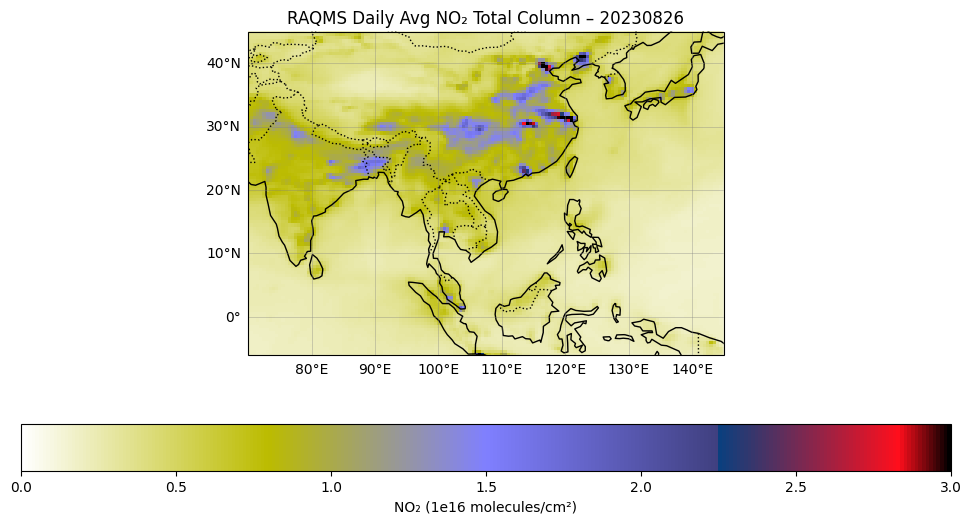

20230827


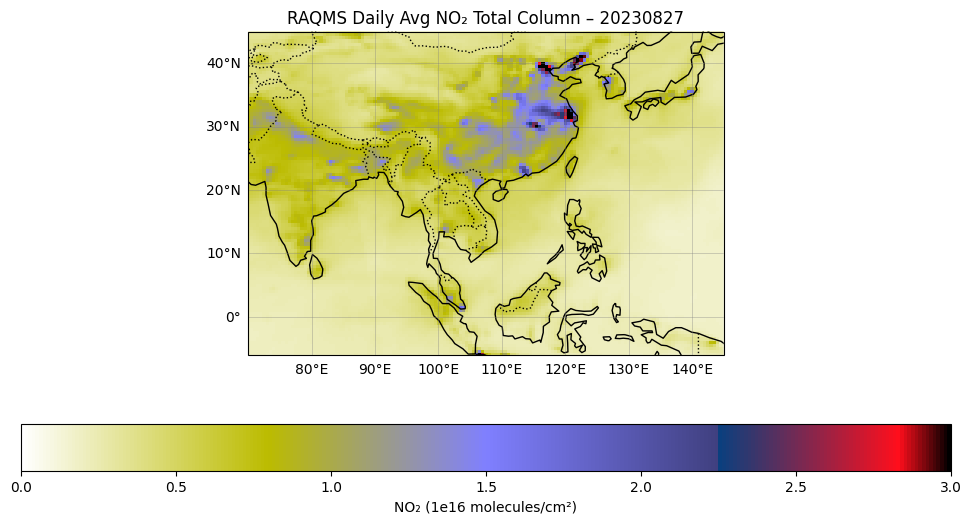

20230828


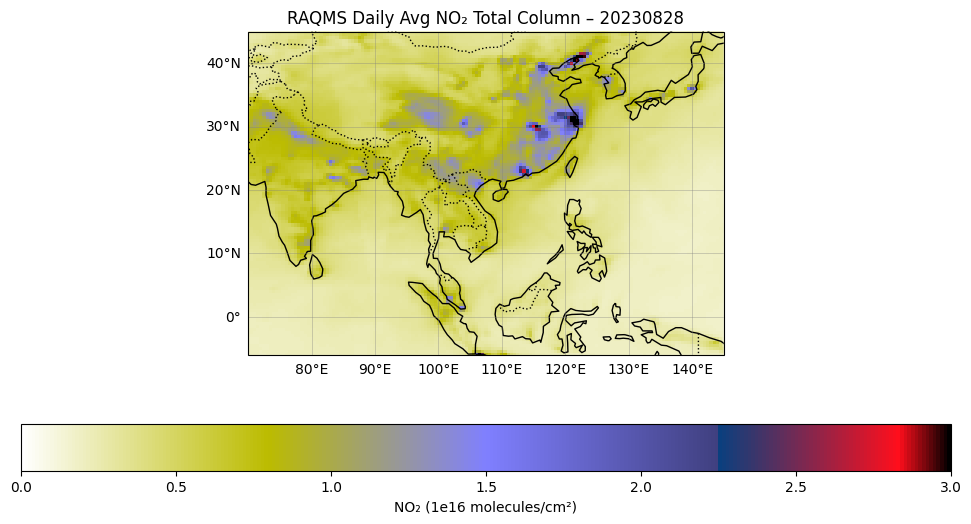

20230829


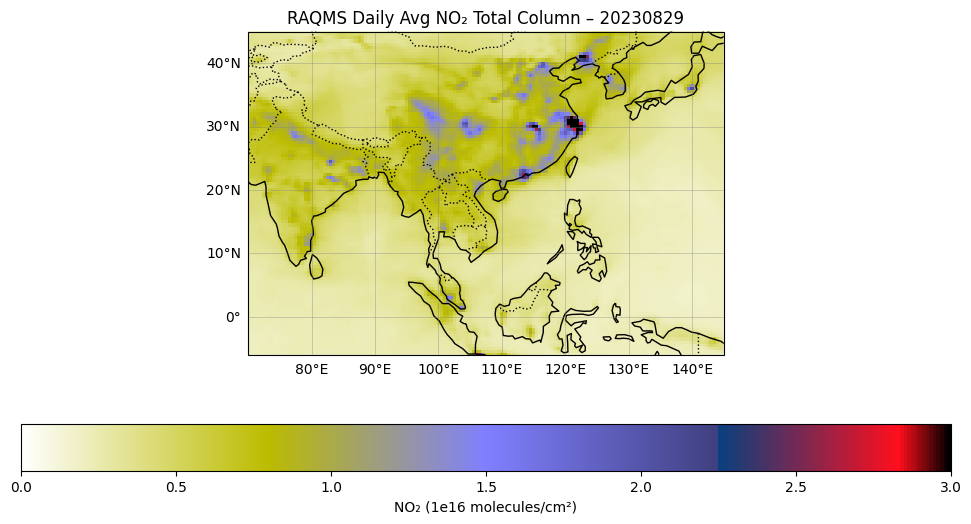

20230830


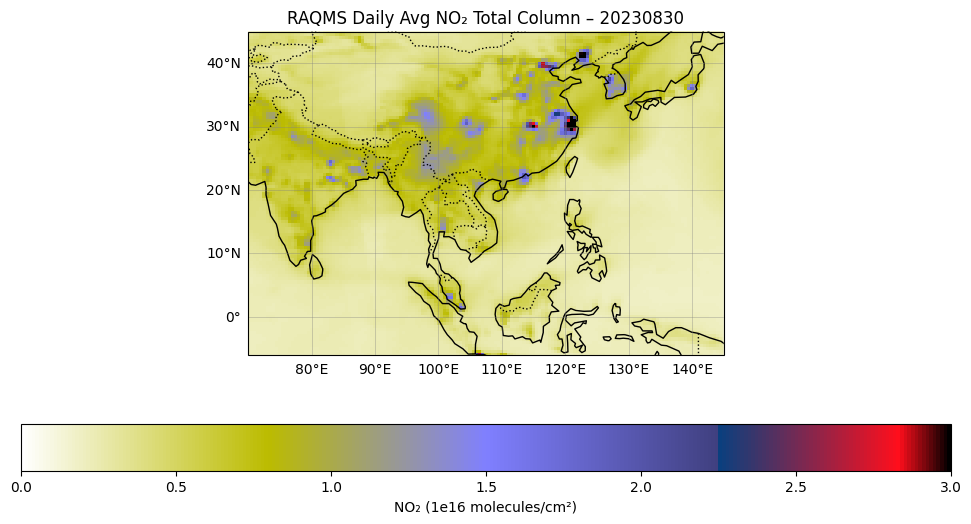

20230831


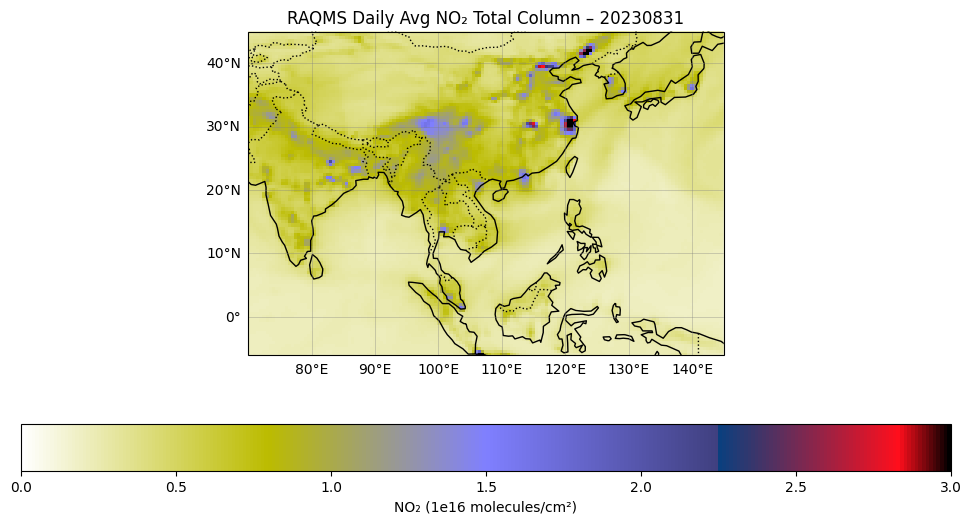

In [ ]:
# Plotting NO2 for a specific day
# Loop through the dates and plot the NO2 data
dates = [
    '20230801', '20230802', '20230803', '20230804', '20230805',
    '20230806', '20230807', '20230808', '20230809', '20230810',
    '20230811', '20230812', '20230813', '20230814', '20230815',
    '20230816', '20230817', '20230818', '20230819', '20230820',
    '20230821', '20230822', '20230823', '20230824', '20230825',
    '20230826', '20230827', '20230828', '20230829', '20230830',
    '20230831'
]

for i in range(0, len(dates)):
    date = str(dates[i])
    print(date)
    day_files = daily_files[date]

    datasets = xr.open_dataset(day_files[0])
    lat = datasets['grid_yt']
    lon = datasets['grid_xt']
    ds_NO2_00 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[1])
    ds_NO2_06 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[2])
    ds_NO2_12 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[3])
    ds_NO2_18 = np.array(datasets['no2tot'])
    ds_NO2 = ds_NO2_00+ds_NO2_06+ds_NO2_12+ds_NO2_18 #sum over the four time steps (00, 06, 12, 18 UTC)


    no2_daily_avg = ds_NO2[0,:,:] / 4  # divide by four to do the average and reshape to the array
    no2_daily_avg_converted = no2_daily_avg*100 # convert to 1e16 like GEMS

    #plotting
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    mesh = ax.pcolormesh(
        lon, lat, no2_daily_avg_converted,
        transform=ccrs.PlateCarree(),
        cmap='gist_stern_r',
        vmin=0,
        vmax=3
)

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xlim(70, 145)
    ax.set_ylim(-6, 45)
    # Overlay latitude and longitude gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(f'RAQMS Daily Avg NO₂ Total Column – {date}')
    plt.colorbar(mesh, orientation='horizontal', label='NO₂ (1e16 molecules/cm²)')
    plt.savefig(f"RAQMS_Figures/{date}.png")
    plt.show()


In [10]:
no2_daily_avg = ds_NO2.mean (axis=0)  # Average over the time dimension
no2_daily_avg_converted = no2_daily_avg*100 # convert to 1e16 like GEMS
print(no2_daily_avg_converted.shape)

(361, 720)


In [18]:
print(ds['no2tot'].attrs)

{'units': '10**18 molec'}
